### Calculate Molecular Representations with Rdkit
Continue from Lecture 3...

In [2]:
import os
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [3]:
# List descriptors available in rdkit
from rdkit.Chem import Descriptors
  
dsc = [n[0] for n in Descriptors._descList]   # there are 208 descriptors divided in physicochemical 
                                              # and fraction of substructure (fr_) descriptors; use n[0] because
                                              # they are stored as tuples, with the first element of each tupla
                                              # being the name of the descriptor
print(dsc)

['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'Slo

In [4]:
#Select just physicochemical descriptors
pc = [i for i in dsc if not i.startswith('fr_')]       # List comprehension
print(pc)

['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'Slo

In [5]:
# Extract molecule smiles and names from a smiles file and store in a pandas dataframe
file = os.path.join('data4', 'zinc_subset.smi')        
df = pd.read_csv(file, sep=' ')                        # Separator is a whitespace in smiles files
df.head()

smi_list = [x for x in df.iloc[0:3]['smiles']]
names = [str(k) for k in df.iloc[0:3]['zinc_id']]        # Properties to rdkit mol objects must be strings

dc = {}

for key in names:
    for value in smi_list:
        dc[key] = value
        smi_list.remove(value)
        break
dc 

{'39392021': 'c1ccc(Nc2ccc(-c3ccccc3)cc2)cc1',
 '2571326': 'CC1=CCCC(C)=CCCC(C)=CCC1',
 '59796871': 'CCCCCc1ccc(-c2ccc(C)cc2)cc1'}

3


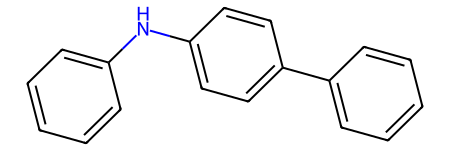

In [6]:
# Access a specific descriptor
mol = Chem.MolFromSmiles(dc['39392021'])
nrb = Descriptors.NumRotatableBonds(mol)
print(nrb)
mol

In [7]:
# Calculate all physicochemical descriptors for a molecule
from rdkit.ML.Descriptors import MoleculeDescriptors

calc = MoleculeDescriptors.MolecularDescriptorCalculator(pc)      # Argument must be the list of descriptors to calculate
mol_pc = calc.CalcDescriptors(mol)                                # Apply calculator to CalcDescriptors on the molecule

In [8]:
# Molecular fingerprints: Morgan fingerprints
from rdkit.Chem import AllChem
from rdkit import DataStructs

fp = np.array(AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024,useChirality=True))

In [9]:
print(fp)
print(np.where(fp==1))     # Print indexes where the bit is set

[0 0 0 ... 0 0 0]
(array([ 64, 128, 136, 175, 191, 356, 389, 491, 500, 703, 726, 736, 820,
       843, 849, 896, 940]),)


In [10]:
# Load 3d data from SDF files and extract coordinates
sdf = os.path.join('data4', 'ethanol.sdf')
suppl = Chem.SDMolSupplier(sdf, removeHs=False)    #Keep hydrogens

for m in suppl:
    eth = m
    
atm = [atom.GetSymbol() for atom in eth.GetAtoms()]
coord = [np.array(eth.GetConformer().GetAtomPosition(idx)) for idx,n in enumerate(eth.GetAtoms())]    #This is how you get 3D coordinates

In [11]:
print(coord)

[array([0.7079, 0.    , 0.    ]), array([-0.7079,  0.    ,  0.    ]), array([-1.0732, -0.769 ,  0.6852]), array([-1.0731, -0.1947, -1.0113]), array([-1.0632,  0.9786,  0.3312]), array([ 0.9936, -0.8804, -0.298 ])]


### Exercise (20 min)
- Using Pandas dataframe, create a new dataframe with the first 100 molecules from zinc_subset.smi and add one column with the computed morgan fingeprint stored as NumPy vector
- Add additional columns for all the rdkit 2D descriptors, where each column should store one float value per molecule 

PS. Do not worry too much about the warnings raised by Pandas in this case

In [12]:
#a
from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(df,'smiles','rdkit_mol')

In [13]:
df1 = df.head(100).copy()     #This is to avoid the warning from pandas. Warning in this case does not cause any issue to your data
df1['morgan_fp'] = [np.array(AllChem.GetMorganFingerprintAsBitVect(m,2,nBits=1024,useChirality=True)) for m in df1['rdkit_mol']]

In [15]:
#b
for i in pc:
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([i])
    df1[i] = [float(np.array(calc.CalcDescriptors(mol))) for mol in df1['rdkit_mol']]

/var/folders/1_/8wkmv2d94wb9mklzvpyxshdm0000gn/T/ipykernel_57003/1826108991.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[i] = [float(np.array(calc.CalcDescriptors(mol))) for mol in df1['rdkit_mol']]
/var/folders/1_/8wkmv2d94wb9mklzvpyxshdm0000gn/T/ipykernel_57003/1826108991.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[i] = [float(np.array(calc.CalcDescriptors(mol))) for mol in df1['rdkit_mol']]
/var/folders/1_/8wkmv2d94wb9mklzvpyxshdm0000gn/T/ipykernel_57003/1826108991.py:4: PerformanceWarning: DataFrame is

In [16]:
df1.head()

,smiles,zinc_id,rdkit_mol,morgan_fp,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR
0,c1ccc(Nc2ccc(-c3ccccc3)cc2)cc1,39392021,<rdkit.Chem.rdchem.Mol object at 0x13130f900>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.382576,1.102668,3.382576,1.102668,0.676761,245.325,...,1.0,1.0,1.0,3.0,0.0,0.0,0.0,3.0,5.09720,81.6027
1,CC1=CCCC(C)=CCCC(C)=CCC1,2571326,<rdkit.Chem.rdchem.Mol object at 0x13130f7b0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.404880,1.219110,2.404880,1.219110,0.476884,204.357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.17950,68.9730
2,CCCCCc1ccc(-c2ccc(C)cc2)cc1,59796871,<rdkit.Chem.rdchem.Mol object at 0x13130f6d0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.268701,1.210335,2.268701,1.210335,0.612149,238.374,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,5.39472,79.8440
3,CC(C)c1ccc2ccc(C(C)C)cc2c1,2567291,<rdkit.Chem.rdchem.Mol object at 0x13130f970>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.325278,0.603802,2.325278,0.603802,0.650362,212.336,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,5.08660,72.1260
4,CCCCC[C@H]1CC[C@H](c2ccc(F)cc2)CC1,245189327,<rdkit.Chem.rdchem.Mol object at 0x13130f9e0>,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.888853,-0.118517,12.888853,0.118517,0.587980,248.385,...,0.0,0.0,1.0,5.0,1.0,0.0,1.0,2.0,5.67980,75.2410


### Gradient Descent algorithm

Let's write the 1D gradient descent algorithm and apply it to a parabola function
$f(x) = x^2 - 2x -3$

In [17]:
def GradientDescentSimple(func, fprime, x0, alpha, tol=1e-5, max_iter=1000):   # Where there are values, those are the default
                                                                               # unless specified otherwise
    # Initialize x, f(x), and -f'(x)
    xk = x0
    fk = func(xk)                      # Passing these functions as arguments of the function
    pk = -fprime(xk) # -First derivative
    # Initialize number of iterations, save x and f(x) as lists to keep track
    num_iter = 0
    curve_x = [xk]
    curve_y = [fk]
    # Do iterations
    while abs(pk) > tol and num_iter < max_iter:      # While either derivative is ~0 or max iterations are reached
        # Calculate new x, f(x), and -f'(x)
        xk = xk + alpha * pk  # x1 = x0 +alpha*derivativeofunction(x0)
        fk = func(xk) #f1 = f(x1)
        pk = -fprime(xk) #derivative of f (x1)
        # Increase number of steps by 1, save new x and f(x)
        num_iter += 1
        curve_x.append(xk) # save the curve x0 and x1
        curve_y.append(fk) # save the values f(x0) and f(x1)
    # Print results / stopping criteria
    if num_iter == max_iter:
        print('Gradient descent does not converge.')
    else:
        print('Solution found:\n  y = {:.4f}\n  x = {:.4f}'.format(fk, xk))
    
    return curve_x, curve_y     # Return the list of updated x values and respective function values

In [62]:
# Simple functions plotFunc() and plotPath() to help 
# us on visualizing the gradient descent steps and the graph of the function we want to minimize
import matplotlib.pyplot as plt

def plotFunc(x0, function): # Initial point (our first example x0 = -8) and a function
    plt.plot(x, function(x)) # Plot the graph of the function
    plt.plot(x0, function(x0), 'ro') # Plot a red dot on the initial condition
    plt.xlabel('x') # Make the x-axis (and label it x)
    plt.ylabel('f(x)') # Make the y-axis (and label it f(x))
    plt.title('Objective Function') # Title of the picture/graph that we create

def plotPath(xs, ys, x0, function):   # Plot the updates
    plotFunc(x0,function)
    plt.plot(xs, ys, linestyle='--', marker='o', color='orange')
    plt.plot(xs[-1], ys[-1], 'ro')   # Plot last x and f(x)

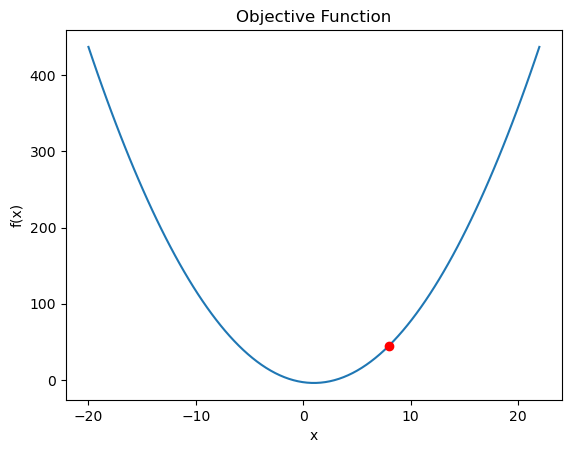

In [63]:
x0 = 8 # Initial point

def parabola(x): # Definition of a function - a polynomial of degree 2
    return x**2 - 2*x - 3

def fprime(x): # Derivative of f
    return 2*x - 2

x = np.linspace(-20, 22, 100) # Range of the axis x (linspace requires n steps and infers steps, arange does viceversa)
plotFunc(x0, parabola)


Solution found:
  y = -4.0000
  x = 1.0000


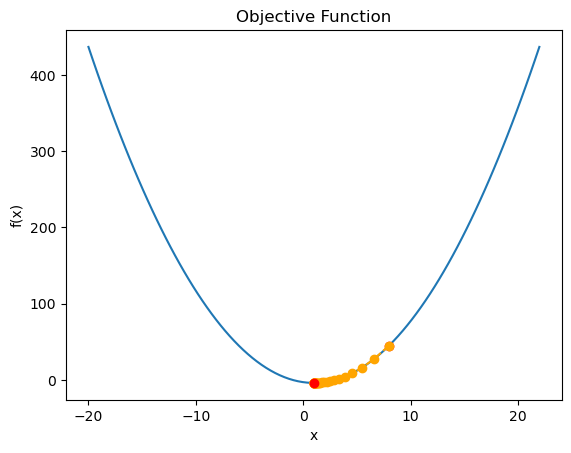

In [67]:
# Setting an initial learning rate of 0.1
xs, ys = GradientDescentSimple(parabola, fprime, x0, alpha=0.1)
plotPath(xs, ys, x0, parabola)

The first scenario $\alpha = 0.1$ and $x_0 = -4$ gradient descent converges like a charm. Even though the learning rate is constant, the direction is decreasing towards zero and hence results in a convergence.

Now, let is change a little bit the parameters and see what happens. 

Solution found:
  y = -4.0000
  x = 1.0000


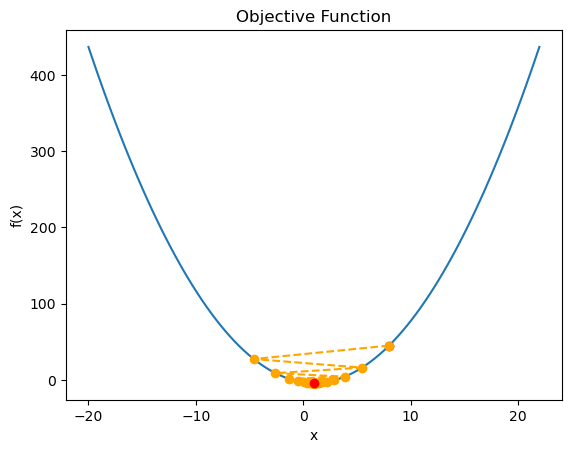

In [69]:
# Larger learning rate
xs, ys = GradientDescentSimple(parabola, fprime, x0, alpha=0.9)
plotPath(xs, ys, x0, parabola)

The second scenario $\alpha = 0.9$ and $x_0 = -4$ also converges even though the minimization path is oscillating around the solution due to the big learning rate. What happens if we take $\alpha$ super small?

Gradient descent does not converge.


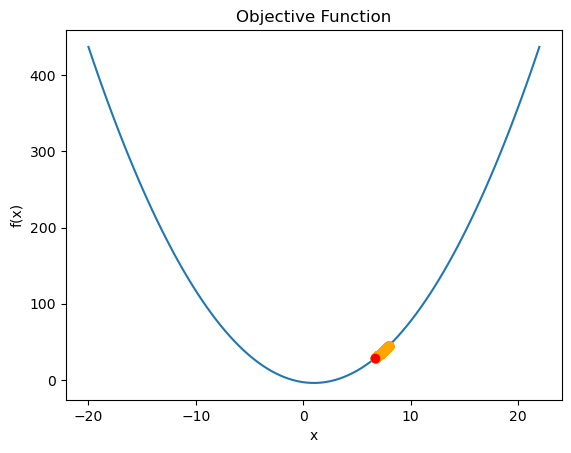

In [70]:
xs, ys = GradientDescentSimple(parabola, fprime, x0, alpha=1e-4)
plotPath(xs, ys, x0, parabola)

The third scenario $\alpha = 10^{-4} = 0.0001$ and $x_0=-4$ moves towards the solution. However, the learning rate is so small so that the number of iterations is maxed out. This can be solved by simply increasing the number of iterations. In this example if the number of iterations is equal to $8x10^{4}$ the gradient descent method converges to a solution. Rather if the number of iterations is $7x10^{4}$ the solution does not converge.

Solution found:
  y = -4.0000
  x = 1.0000


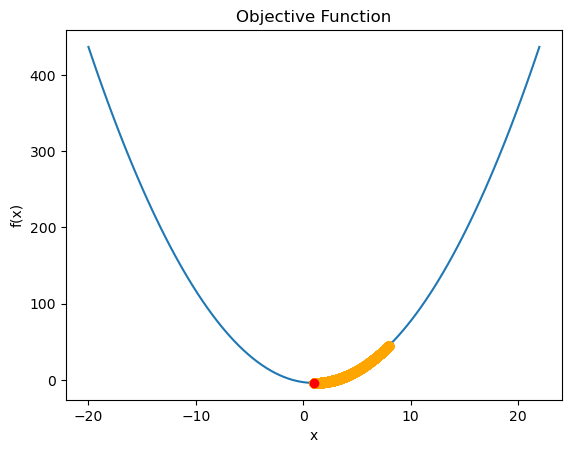

In [72]:
# Increasing the number of iterations
xs, ys = GradientDescentSimple(parabola, fprime, x0, alpha=1e-4, max_iter=80000)
plotPath(xs, ys, x0, parabola)

Finally, if the learning rate is very high, we may even see divergence (moving away from minimum) instead of convergence to the minimum. Basically, the algorithm overshoot the minimum causing an increase in the objective function. While it is possible to determine at which learning rate gradient descent would diverge for a given function, in practice learning rates are tested empirically and often a variable learning rate is used (higher far from the minimum and lower when getting closer).

Gradient descent does not converge.


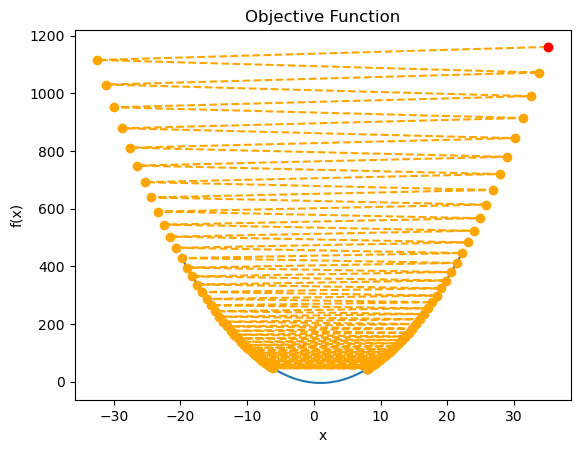

In [77]:
# Gradient descent divergence due to high learning rate
xs, ys = GradientDescentSimple(parabola, fprime, x0, alpha=1.01, max_iter=80)
plotPath(xs, ys, x0, parabola)